In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [2]:
data=pd.read_csv("1000_Companies.csv")
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


C:\Users\HI-TECH\AppData\Local\Temp\ipykernel_568\2087146155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s=sns.heatmap(data.corr())#,annot=True)


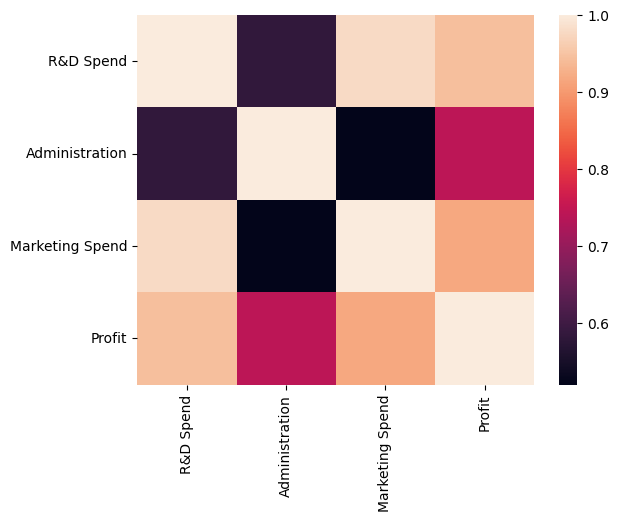

In [3]:
s=sns.heatmap(data.corr())#,annot=True)

In [4]:
encode=LabelEncoder()
data['State']=encode.fit_transform(data['State'])
x=data.iloc[:, :-1]
y=data.iloc[:,4]
print(data.head()) 

   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      2  192261.83
1  162597.70       151377.59        443898.53      0  191792.06
2  153441.51       101145.55        407934.54      1  191050.39
3  144372.41       118671.85        383199.62      2  182901.99
4  142107.34        91391.77        366168.42      1  166187.94


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
print(y_test)

993     89012.02672
859     87654.55773
298     94093.35179
553    175396.26160
672     83356.61784
           ...     
679    164779.98270
722    168402.17810
215    145976.17530
653    141082.79440
150    108917.01570
Name: Profit, Length: 200, dtype: float64


In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=regressor.predict(X_test)
print(y_pred)
y_pred.shape

[ 89624.88499983  88261.44060358  94728.57723845 176034.49990954
  83234.84214495 110393.04058199 131831.18880607  91307.52461765
 164414.26754671  53585.35570743  66786.11950078 150921.89704628
 126746.78121459  59174.341725   177341.80724482  75139.98127599
 118605.9491146  164403.24374731 171336.34862472 181885.06087421
 118762.26624783  85504.5201526  181345.84072646  83979.76201107
 104839.00200137 101067.00608604  53722.31401539  56706.45386115
  68732.18107141 209811.34272095 121136.34391499 111557.54775873
 101309.70393418 138315.39958078  63806.10546728 108690.79660343
 185830.38310114 171796.58186122 174997.97325294 118029.33822338
  96553.52264734 165281.03076793 107557.31012676  50557.29080259
 116871.82636073  58469.02312669 158771.35516035  78902.17488961
 160082.45834529 131494.74562654 185233.67354482 174962.79318566
  93579.64586335  78164.61392891 180561.94494338  84821.87449117
 143256.92009399 170435.21728058  84188.13777206 105128.89266268
 142016.17711741  52352.6

(200,)

In [8]:
#How good the predict is
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112595959622044

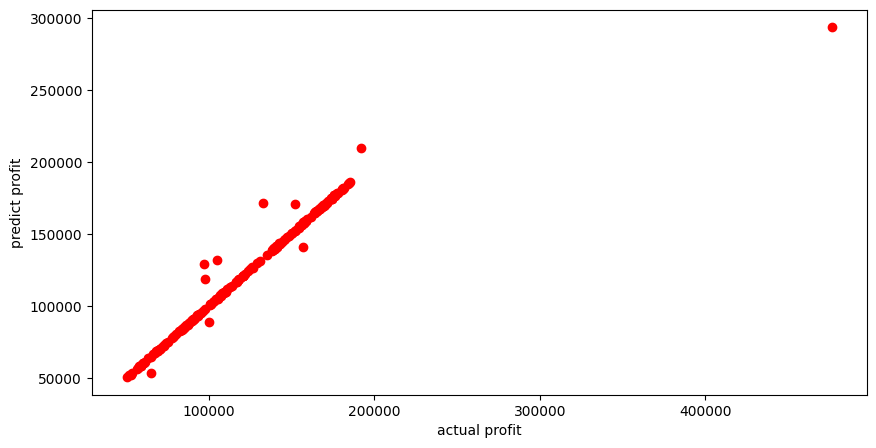

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.xlabel('actual profit')
plt.ylabel('predict profit')
plt.show()

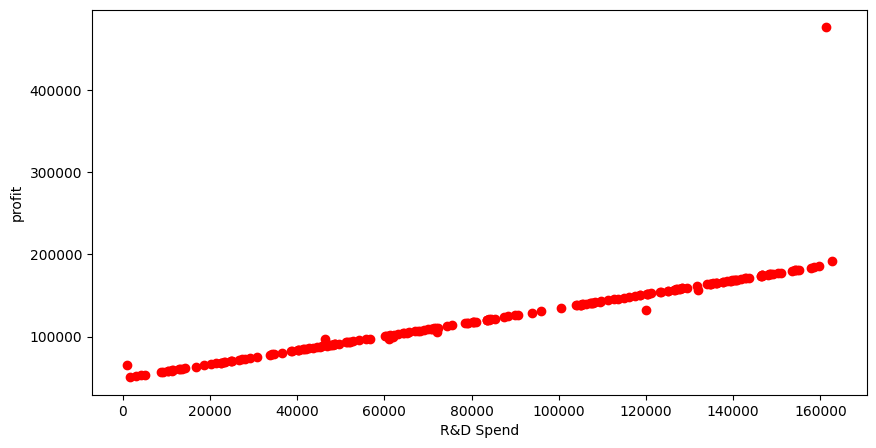

In [37]:
#plt.scatter(x,y)
plt.figure(figsize=(10,5))
plt.scatter(x=X_test['R&D Spend'],y=y_test,color='red')
plt.xlabel('R&D Spend')
plt.ylabel('profit')
plt.show()

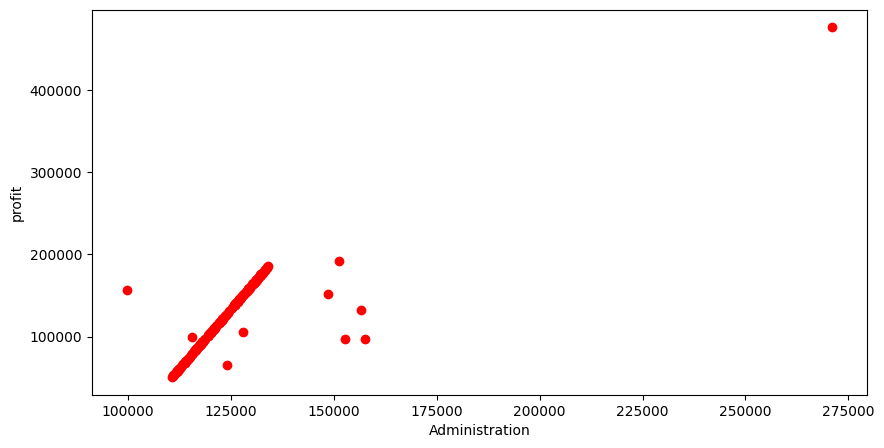

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(x=X_test['Administration'],y=y_test,color='red')
plt.xlabel('Administration')
plt.ylabel('profit')
plt.show()

In [10]:
pred_y_df=pd.DataFrame({'Actual value':y_test,'Predict value':y_pred,'error':y_test-y_pred })
print(pred_y_df.tail())

     Actual value  Predict value       error
679   164779.9827  165726.359678 -946.376978
722   168402.1781  169009.629562 -607.451462
215   145976.1753  146839.780849 -863.605549
653   141082.7944  141215.120285 -132.325885
150   108917.0157  108907.752841    9.262859


In [11]:
#The equation for multiple linear regression :
#y=m1*x1+m2*x2......mn*xn+C 
print (regressor.intercept_)

-51144.726425721834


In [12]:
print(regressor.coef_)

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


#### So the equation is :5.27*X1+8.44*X2+1.06*X3-3.54X4-51144.72


In [13]:
print(data.corr())

                 R&D Spend  Administration  Marketing Spend     State  \
R&D Spend         1.000000        0.582434         0.978407 -0.001360   
Administration    0.582434        1.000000         0.520465 -0.018386   
Marketing Spend   0.978407        0.520465         1.000000 -0.001420   
State            -0.001360       -0.018386        -0.001420  1.000000   
Profit            0.945245        0.741560         0.917270 -0.005718   

                   Profit  
R&D Spend        0.945245  
Administration   0.741560  
Marketing Spend  0.917270  
State           -0.005718  
Profit           1.000000  
